## 1º turno da votação para tema da XXX COMECON

Este notebook calcula estatísticas do 1º turno de votação para tema da XXX COMECON. Foram disponibilizados 34 temas, sendo possível ao participante escolher quantos quisesse.

Vamos carregar alguns módulos importantes:

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import networkx as nx
from collections import Counter

O arquivo foi recebido do Google Sheets no formato tab-separated values (.tsv). Antes de qualquer coisa, nos asseguramos de que nenhum dos temas contivesse os caracteres `,` ou `\t` (como foi o caso de `Ave, Cristo!`, que corrigimos).

O programa lê a coluna de emails apenas para garantir unicidade do voto (em caso de duplicidade, considera válido o último voto registrado pelo participante). Após este trecho de código, os campos `nome` e `email` são esquecidos e apenas a coluna de `votos` é considerada, no propósito de manter sigilo com relação ao nome dos participantes.

In [2]:
with open('./respostas.tsv') as f:
    f.readline() # read header first
    votes = {l.split('\t')[2]: list(map(str.strip, l.split('\t')[3].split(','))) for l in f.readlines()}

votes = [v[1] for v in votes.items()]
total_votos = len(votes)
print("%d votos válidos computados." % total_votos)

52 votos válidos computados.


### Número de temas escolhidos

Para caracterizar a votação, aqui exibimos o número de temas que cada pessoa escolheu em seu voto. O histograma mostra que a maior parte dos participantes escolheu 5 ou 6 temas da lista.

Quantidade de temas que cada pessoa escolheu: [18, 15, 14, 14, 12, 12, 11, 11, 10, 10, 10, 10, 10, 10, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 2, 1, 1]


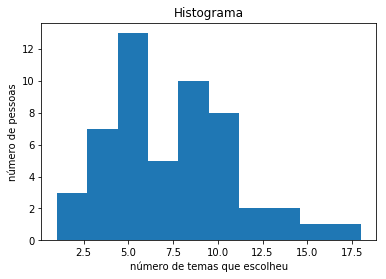

In [3]:
print('Quantidade de temas que cada pessoa escolheu:', sorted([len(v) for v in votes], reverse=True))
plot.hist([len(v) for v in votes])
plot.title('Histograma')
plot.xlabel('número de temas que escolheu')
plot.ylabel('número de pessoas')
plot.show()

### Apuração

Aqui computamos o número total de votos recebidos por cada tema, exibindo-os em ordem decrescente desse valor. Também é exibida a porcentagem de pessoas que escolheram o respectivo tema em seu voto.

In [4]:
result = sorted(Counter([i for vote in votes for i in vote]).items(), key=lambda b: b[1], reverse=True)
temas = [r[0] for r in result]
for i, (t, n) in enumerate(result):
    print('%2d - %2d votos (%2d%%): %s' % (i+1, n, 100*n/total_votos, t))
print()
print(len(temas), 'temas.')

 1 - 25 votos (48%): Mulheres do/no Evangelho
 2 - 23 votos (44%): Francisco de Assis
 3 - 21 votos (40%): Mulheres na História do Espiritismo
 4 - 17 votos (32%): Evolução em Dois Mundos
 5 - 17 votos (32%): Ser espírita
 6 - 17 votos (32%): Arte e Espiritismo / Espiritismo na Arte
 7 - 16 votos (30%): Espiritismo no Brasil / História do Espiritismo no Brasil
 8 - 16 votos (30%): Transição planetária
 9 - 15 votos (28%): Amizade / Laços de amizade
10 - 15 votos (28%): O mundo atual
11 - 14 votos (26%): Chico Xavier
12 - 12 votos (23%): A Caminho da Luz
13 - 12 votos (23%): Mediunidade / Mediunidade e vida
14 - 12 votos (23%): Jesus / Jesus Guia e Modelo
15 - 12 votos (23%): Pluralidade de Mundos Habitados
16 - 11 votos (21%): Paulo e Estêvão
17 - 11 votos (21%): História do Espiritismo
18 - 10 votos (19%): COMECON
19 -  9 votos (17%): A vida no mundo dos Espíritos
20 -  9 votos (17%): Livro Nosso Lar
21 -  9 votos (17%): Doutrina Espírita tríplice aspecto
22 -  9 votos (17%): Espiriti

### Apuração com peso $1/n$

Se o voto de cada pessoa tiver peso $1/n$, onde $n$ é o número de temas escolhidos por ela, o resultado será:

In [5]:
result_normalized = np.zeros(len(temas))

for v in votes:
    for i, t in enumerate(temas):
        if t in v:
            result_normalized[i] += 1/len(v)
        
for i in result_normalized.argsort()[::-1]:
    print("%2d - %.2f votos: %s" % (i+1, result_normalized[i], temas[i]))

 1 - 3.71 votos: Mulheres do/no Evangelho
 2 - 3.32 votos: Francisco de Assis
 8 - 3.11 votos: Transição planetária
 3 - 2.98 votos: Mulheres na História do Espiritismo
 4 - 2.57 votos: Evolução em Dois Mundos
 6 - 2.17 votos: Arte e Espiritismo / Espiritismo na Arte
20 - 2.15 votos: Livro Nosso Lar
 5 - 2.05 votos: Ser espírita
 7 - 2.02 votos: Espiritismo no Brasil / História do Espiritismo no Brasil
12 - 1.95 votos: A Caminho da Luz
11 - 1.91 votos: Chico Xavier
10 - 1.86 votos: O mundo atual
 9 - 1.64 votos: Amizade / Laços de amizade
16 - 1.50 votos: Paulo e Estêvão
15 - 1.47 votos: Pluralidade de Mundos Habitados
13 - 1.43 votos: Mediunidade / Mediunidade e vida
18 - 1.38 votos: COMECON
14 - 1.38 votos: Jesus / Jesus Guia e Modelo
21 - 1.29 votos: Doutrina Espírita tríplice aspecto
17 - 1.28 votos: História do Espiritismo
23 - 1.09 votos: Romances de Emmanuel
25 - 0.94 votos: Música
19 - 0.92 votos: A vida no mundo dos Espíritos
22 - 0.90 votos: Espiritismo no Brasil e no Mundo
2

### Estatísticas para o segundo turno

De utilidade para a definição do segundo turno, abaixo computamos algumas porcentagens para os temas mais votados:

In [6]:
quant = {'tot2': 0,
         'tot3':  0,
         't0and2': 0,
         't0or2': 0,
         't1and0or2': 0,
         'francisco': 0,
         't0not2': 0,
         't2not0': 0,
        }

for v in votes:
    if temas[0] in v or temas[1] in v:
        quant['tot2'] += 1
    if temas[0] in v or temas[1] in v or temas[2] in v:
        quant['tot3'] += 1
    if temas[0] in v and temas[2] in v:
        quant['t0and2'] += 1
    if temas[0] in v or temas[2] in v:
        quant['t0or2'] += 1
    if temas[1] in v and (temas[0] in v or temas[2] in v):
        quant['t1and0or2'] += 1
    if temas[1] in v:
        quant['francisco'] += 1
    if temas[0] in v and temas[2] not in v:
        quant['t0not2'] += 1
    if temas[2] in v and temas[0] not in v:
        quant['t2not0'] += 1
        
        
print("%d%% do total de participantes votou em algum dos 2 primeiros lugares:\n\t-> %s\n\t-> %s\n" \
      % (100*quant['tot2']/total_votos, temas[0], temas[1]))
print("%d%% do total de participantes votou em algum dos 3 primeiros lugares:\n\t-> %s\n\t-> %s\n\t-> %s\n" \
      % (100*quant['tot3']/total_votos, temas[0], temas[1], temas[2]))
print("Dentre os eleitores dos temas 'mulheres':\n\t%2d%% votou só %s,\n\t%2d%% votou em ambos,\n\t%2d%% votou só %s.\n" \
      % (100*quant['t0not2']/quant['t0or2'], temas[0], 100*quant['t0and2']/quant['t0or2'], 100*quant['t2not0']/quant['t0or2'], temas[2]))

print("%d%% dos eleitores de %s também votou em algum dos temas 'mulheres'.\n" \
      % (100*quant['t1and0or2']/quant['francisco'], temas[1]))




69% do total de participantes votou em algum dos 2 primeiros lugares:
	-> Mulheres do/no Evangelho
	-> Francisco de Assis

76% do total de participantes votou em algum dos 3 primeiros lugares:
	-> Mulheres do/no Evangelho
	-> Francisco de Assis
	-> Mulheres na História do Espiritismo

Dentre os eleitores dos temas 'mulheres':
	32% votou só Mulheres do/no Evangelho,
	48% votou em ambos,
	19% votou só Mulheres na História do Espiritismo.

60% dos eleitores de Francisco de Assis também votou em algum dos temas 'mulheres'.



## Correlação entre os temas

Aqui nosso propósito é descobrir correlações na escolha dos temas. Para determinar a correlação, construimos a matriz CDT (Complete Disjunctive Table) com valores 1 para tema escolhido e 0 para tema não escolhido. Branco indica correlação 0 e preto indica correlação máxima: 1.

/home/alonso/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


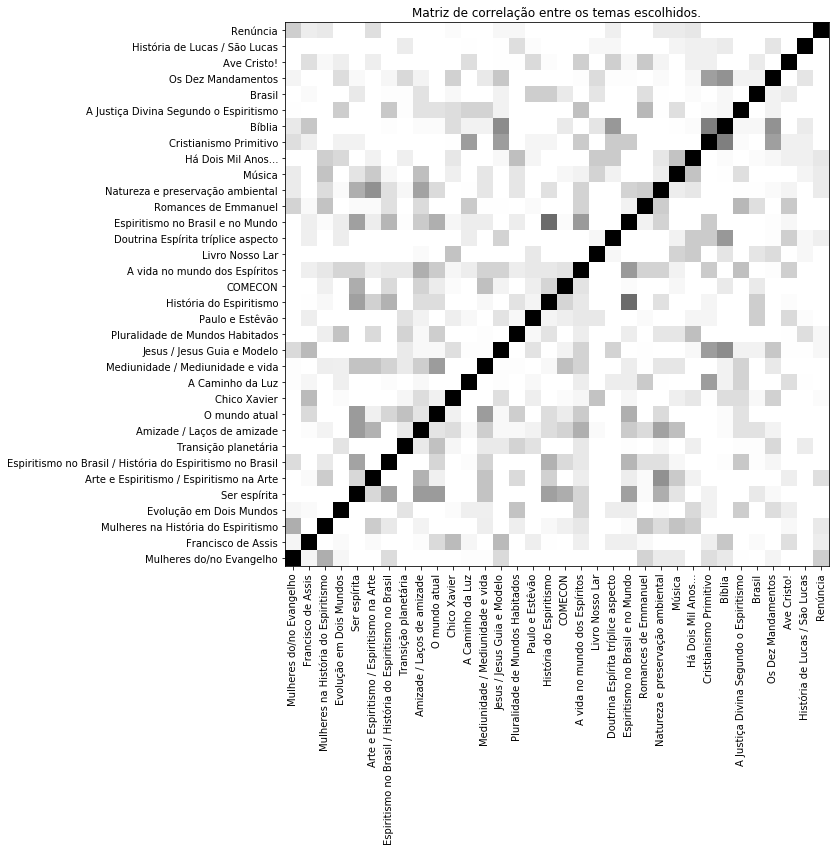

In [7]:
data = np.array([[1 if (t in v) else 0 for t in temas] for v in votes])

corr = np.corrcoef(data.T)
fig, ax = plot.subplots(figsize=(10,10))

ax.set_title("Matriz de correlação entre os temas escolhidos.")
ax.imshow(corr**1.2, origin='bottom', cmap='binary')
ax.set_xticklabels(labels=temas)
ax.set_yticklabels(labels=temas)
plot.xticks(range(len(temas)),rotation=90)
plot.yticks(range(len(temas)))
plot.show()

Aqui mostramos a correlação teórica definida por Otávio & Fred (2019) (vide http://paralaxeestelar.com.br/graph_simp.html). Em amarelo, os temas que se correlacionam.

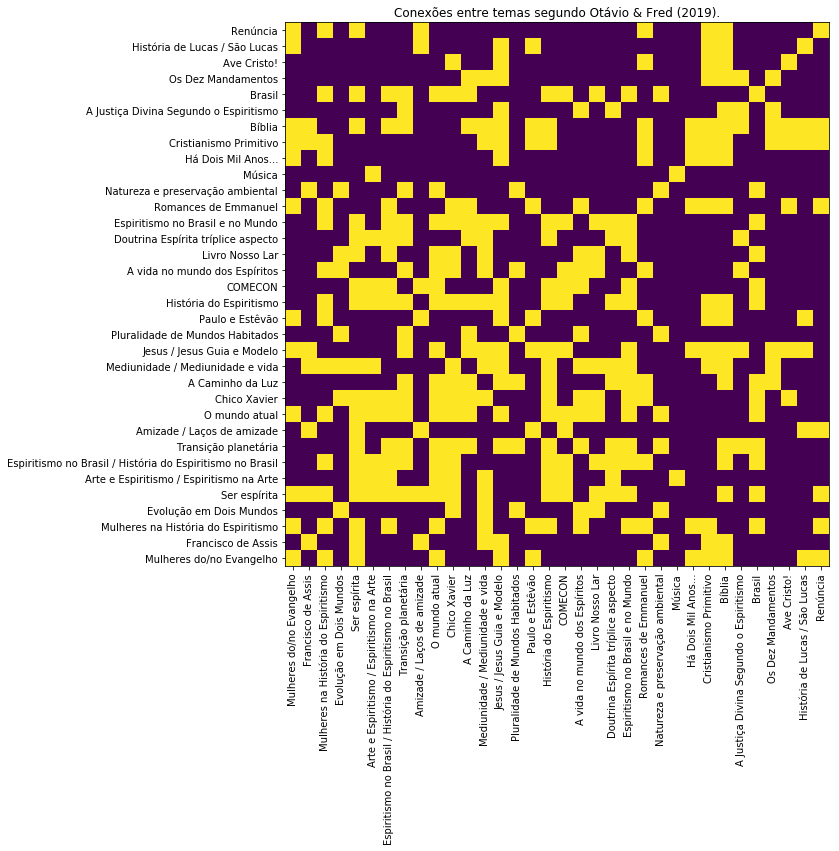

In [8]:
with open('correlation/labels.txt') as f:
    of_labels = [l.strip() for l in f.readlines()]

of_len = len(of_labels)

of_corr = np.zeros((of_len, of_len))
for i,j in np.loadtxt('correlation/pairs.txt', dtype=np.int):
    of_corr[i-1,j-1] = 1
    of_corr[j-1,i-1] = 1

for i in range(of_len):
    of_corr[i,i] = 1

order = [of_labels.index(l) for l in temas]

of_labels = np.array(of_labels)[order]
of_corr = of_corr[order,:][:,order]

fig, ax = plot.subplots(figsize=(10,10))

ax.set_title("Conexões entre temas segundo Otávio & Fred (2019).")
ax.imshow(of_corr, origin='bottom')
ax.set_xticklabels(labels=of_labels)
ax.set_yticklabels(labels=of_labels)
plot.xticks(range(of_len),rotation=90)
plot.yticks(range(of_len))
plot.show()

Aqui colocamos em comparação as duas correlações. Em vermelho, Otávio & Fred (2019). Em ciano, correlação medida a partir da votação.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


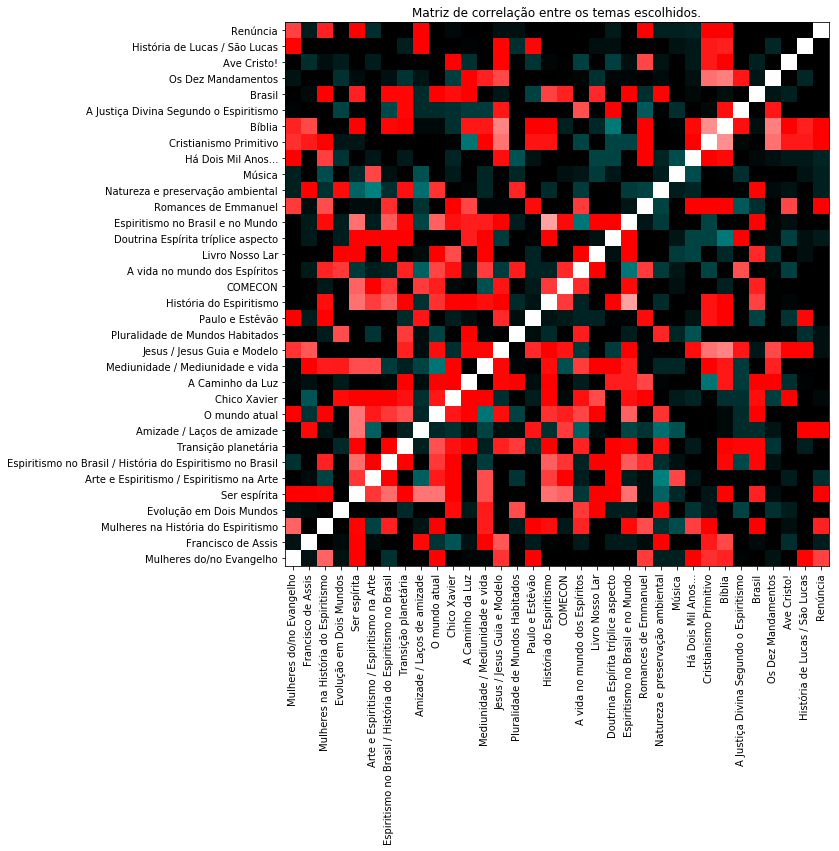

In [9]:
fig, ax = plot.subplots(figsize=(10,10))

ax.set_title("Matriz de correlação entre os temas escolhidos.")
ax.imshow(np.array(np.stack((of_corr, corr, corr), axis=2)), origin='bottom')
ax.set_xticklabels(labels=temas)
ax.set_yticklabels(labels=temas)
plot.xticks(range(len(temas)),rotation=90)
plot.yticks(range(len(temas)))
plot.show()

## MCA (Multiple Correspondence Analysis)

Ponderamos a matriz CDT pela proporção de escolha do tema e centramo-a em zero subtraindo 1 (veja teoria em https://www.youtube.com/watch?v=gZ_7WWEVlTg).

$$x_{ik} = \frac{y_{ik}}{p_k} - 1$$

Logo em seguida computamos os autovalores e autovetores da sua matriz de covariância para determinar os modos que melhor caracterizam a dispersão da nossa amostra.

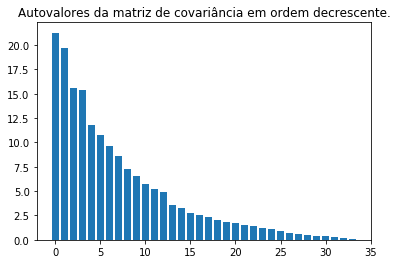

In [10]:
data_mca = data*total_votos/np.sum(data,axis=0)-1
cov = np.cov(data_mca.T)

eival, eivec = np.linalg.eig(cov)
isort = eival.argsort()[::-1]
eival, eivec = eival[isort], eivec[isort]

plot.bar(range(len(eival)),eival)
plot.title('Autovalores da matriz de covariância em ordem decrescente.')
plot.show()

In [11]:
for i in np.abs(eivec[0]).argsort()[::-1][:9]:
    print(temas[i], eivec[0,i])

Cristianismo Primitivo 0.6788819807863983
A Justiça Divina Segundo o Espiritismo 0.3395930368220897
Espiritismo no Brasil e no Mundo 0.31974753750159296
Livro Nosso Lar 0.22976242443104755
Jesus / Jesus Guia e Modelo -0.22318739032415277
Os Dez Mandamentos 0.21916768812543744
Ave Cristo! 0.1668667700399404
Bíblia -0.14708018951159663
História de Lucas / São Lucas 0.13111581588183963


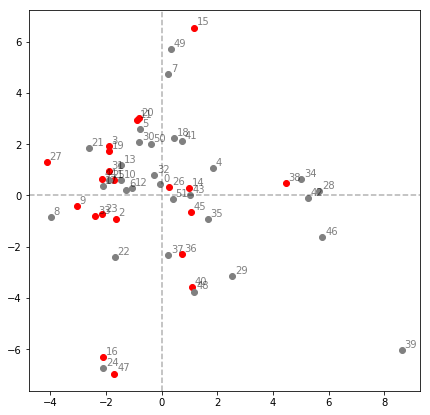

In [12]:
f, ax = plot.subplots(1, figsize=(7,7))

for i, (x, y) in enumerate(zip(np.dot(data_mca, eivec[0]),np.dot(data_mca, eivec[1]))):
    ax.plot(x, y, marker='o', c='red' if (temas[2] in votes[i]) else 'gray')
    ax.annotate(i, (x+0.1, y+0.1), alpha=0.5)

ax.axvline(x=0.0, c='black', linestyle='--', alpha=0.3)
ax.axhline(y=0.0, c='black', linestyle='--', alpha=0.3)
plot.show()

In [13]:
for i in np.where(data[24]==1)[0]:
    print(temas[i])

Mulheres do/no Evangelho
Francisco de Assis
Chico Xavier
Jesus / Jesus Guia e Modelo
Renúncia


## Votação proporcional por grafos

Aqui testamos o moderno método de votação por grafos, com conexões definidas por Otávio & Fred (2019) (vide http://paralaxeestelar.com.br/graph_simp.html). Primeiro carregamos o grafo:

In [14]:
# Create graph and load edges
graph = nx.Graph()

with open("correlation/labels.txt") as f:
    labels = f.readlines()
labels = [x.strip() for x in labels]

for i, l in enumerate(labels):
    graph.add_node(int(i+1), name=l, votes=result[temas.index(l)][1])

graph.add_edges_from(np.loadtxt('correlation/pairs.txt', dtype=int))

# Remove some nodes and edges
# graph.remove_nodes_from([4, 14, 27, 29, 33])
graph.remove_edges_from([(12,26), (20,26), (26,31), (17,26)])

De acordo com Otávio & Fred (2019), o número de conexões que cada tema realiza é:

In [15]:
# Count number of connections
for n in sorted(graph, key=graph.degree, reverse=True):
    print("%2d conexões - %s" % (graph.degree[n], labels[n-1]))

18 conexões - Bíblia
18 conexões - Ser espírita
17 conexões - Jesus / Jesus Guia e Modelo
16 conexões - O mundo atual
16 conexões - História do Espiritismo
15 conexões - Mediunidade / Mediunidade e vida
15 conexões - Transição planetária
15 conexões - Chico Xavier
14 conexões - Espiritismo no Brasil / História do Espiritismo no Brasil
14 conexões - Espiritismo no Brasil e no Mundo
13 conexões - Cristianismo Primitivo
12 conexões - A Caminho da Luz
12 conexões - Romances de Emmanuel
12 conexões - Brasil
11 conexões - Mulheres do/no Evangelho
10 conexões - COMECON
10 conexões - Mulheres na História do Espiritismo
10 conexões - A vida no mundo dos Espíritos
 9 conexões - Arte e Espiritismo / Espiritismo na Arte
 9 conexões - Doutrina Espírita tríplice aspecto
 9 conexões - Livro Nosso Lar
 7 conexões - Francisco de Assis
 7 conexões - Renúncia
 7 conexões - Paulo e Estêvão
 6 conexões - Evolução em Dois Mundos
 6 conexões - História de Lucas / São Lucas
 6 conexões - Os Dez Mandamentos
 6

Os nós cujas vizinhanças receberam mais votos são:

In [16]:
# Computes the winner based on parameter votes
get_node_votes = lambda a: a[1]+sum(graph.node('votes')[n] for n in graph[a[0]])

top_nodes = sorted(graph.nodes.data('votes'), key=get_node_votes, reverse=True)

for n in top_nodes:
    print("%3d pontos - %s" % (get_node_votes(n), labels[n[0]-1]))

254 pontos - Ser espírita
227 pontos - O mundo atual
210 pontos - História do Espiritismo
205 pontos - Bíblia
198 pontos - Mediunidade / Mediunidade e vida
195 pontos - Jesus / Jesus Guia e Modelo
192 pontos - Chico Xavier
189 pontos - Espiritismo no Brasil e no Mundo
184 pontos - Espiritismo no Brasil / História do Espiritismo no Brasil
178 pontos - Transição planetária
164 pontos - Brasil
143 pontos - Romances de Emmanuel
143 pontos - Mulheres na História do Espiritismo
138 pontos - Cristianismo Primitivo
137 pontos - COMECON
136 pontos - Mulheres do/no Evangelho
135 pontos - A Caminho da Luz
129 pontos - Arte e Espiritismo / Espiritismo na Arte
128 pontos - A vida no mundo dos Espíritos
125 pontos - Doutrina Espírita tríplice aspecto
124 pontos - Livro Nosso Lar
102 pontos - Renúncia
100 pontos - Francisco de Assis
 97 pontos - Natureza e preservação ambiental
 88 pontos - Paulo e Estêvão
 83 pontos - Amizade / Laços de amizade
 81 pontos - Evolução em Dois Mundos
 80 pontos - Histó

Por fim, os temas mais votados ligados ao nó vencedor são:

In [17]:
node_win = top_nodes[0][0]
winners = sorted(((n, graph.node('votes')[n]) for n in graph[node_win]), key=lambda a:a[1], reverse=True)

for n, v in winners:
    print("%2d pontos - %s" % (v, labels[n-1]))

25 pontos - Mulheres do/no Evangelho
23 pontos - Francisco de Assis
21 pontos - Mulheres na História do Espiritismo
17 pontos - Arte e Espiritismo / Espiritismo na Arte
16 pontos - Espiritismo no Brasil / História do Espiritismo no Brasil
16 pontos - Transição planetária
15 pontos - O mundo atual
15 pontos - Amizade / Laços de amizade
14 pontos - Chico Xavier
12 pontos - Mediunidade / Mediunidade e vida
11 pontos - História do Espiritismo
10 pontos - COMECON
 9 pontos - Livro Nosso Lar
 9 pontos - Doutrina Espírita tríplice aspecto
 9 pontos - Espiritismo no Brasil e no Mundo
 6 pontos - Bíblia
 6 pontos - Brasil
 3 pontos - Renúncia


### Com peso $1/n$
Para o caso com peso $1/n$, os nós cujas vizinhanças receberam mais votos são:

In [18]:
# Create graph and load edges
graph = nx.Graph()

for i, l in enumerate(labels):
    graph.add_node(int(i+1), name=l, votes=result_normalized[temas.index(l)])

graph.add_edges_from(np.loadtxt('correlation/pairs.txt', dtype=int))

# Remove some nodes and edges
# graph.remove_nodes_from([4, 14, 27, 29, 33])
graph.remove_edges_from([(12,26), (20,26), (26,31), (17,26)])

# Computes the winner based on parameter votes
get_node_votes = lambda a: a[1]+sum(graph.node('votes')[n] for n in graph[a[0]])

top_nodes = sorted(graph.nodes.data('votes'), key=get_node_votes, reverse=True)

for n in top_nodes:
    print("%5.2f pontos - %s" % (get_node_votes(n), labels[n[0]-1]))

35.09 pontos - Ser espírita
31.30 pontos - O mundo atual
28.28 pontos - Bíblia
27.87 pontos - História do Espiritismo
26.75 pontos - Chico Xavier
26.75 pontos - Jesus / Jesus Guia e Modelo
26.42 pontos - Espiritismo no Brasil e no Mundo
26.33 pontos - Mediunidade / Mediunidade e vida
25.58 pontos - Espiritismo no Brasil / História do Espiritismo no Brasil
23.12 pontos - Brasil
23.07 pontos - Transição planetária
19.43 pontos - Romances de Emmanuel
18.65 pontos - A vida no mundo dos Espíritos
18.56 pontos - Mulheres na História do Espiritismo
18.39 pontos - Cristianismo Primitivo
18.17 pontos - A Caminho da Luz
18.12 pontos - Mulheres do/no Evangelho
16.96 pontos - Doutrina Espírita tríplice aspecto
16.56 pontos - Livro Nosso Lar
16.35 pontos - COMECON
16.33 pontos - Arte e Espiritismo / Espiritismo na Arte
13.87 pontos - Natureza e preservação ambiental
13.41 pontos - Renúncia
12.04 pontos - Francisco de Assis
11.54 pontos - Paulo e Estêvão
11.24 pontos - Evolução em Dois Mundos
11.18 

E os temas mais votados ligados ao nó vencedor são:

In [19]:
node_win = top_nodes[0][0]
winners = sorted(((n, graph.node('votes')[n]) for n in graph[node_win]), key=lambda a:a[1], reverse=True)

for n, v in winners:
    print("%.2f pontos - %s" % (v, labels[n-1]))

3.71 pontos - Mulheres do/no Evangelho
3.32 pontos - Francisco de Assis
3.11 pontos - Transição planetária
2.98 pontos - Mulheres na História do Espiritismo
2.17 pontos - Arte e Espiritismo / Espiritismo na Arte
2.15 pontos - Livro Nosso Lar
2.02 pontos - Espiritismo no Brasil / História do Espiritismo no Brasil
1.91 pontos - Chico Xavier
1.86 pontos - O mundo atual
1.64 pontos - Amizade / Laços de amizade
1.43 pontos - Mediunidade / Mediunidade e vida
1.38 pontos - COMECON
1.29 pontos - Doutrina Espírita tríplice aspecto
1.28 pontos - História do Espiritismo
0.90 pontos - Espiritismo no Brasil e no Mundo
0.74 pontos - Brasil
0.65 pontos - Bíblia
0.50 pontos - Renúncia
